In [1]:
import pandas as pd
import re
import json
from tqdm import tqdm
from pymystem3 import Mystem
from multiprocessing import cpu_count
from sklearn.neighbors import NearestCentroid
from gensim.models import Phrases
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import numpy as np
import requests
from gensim.models import Phrases
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from collections import Counter
import gensim
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import gensim
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [2]:
habr = pd.read_csv('/Users/alexandrasorokovikova/Data Science/НИР Сравнение IT/Comparison-of-IT-trends/clustering/habr_DataFrame.csv')


In [3]:
habr

,Unnamed: 0,title,text,hubs,tags
0,0,Небольшой скрипт для Naumen Phone Outsourcing,"Есть задача, в начале каждого месяца выгружать...",\n \n Разработка систем св...,"['naumen', 'bash scripting']"
1,1,Вышла бета-версия Flash Player 10.2,Вчера Adobe анонсировала бета-версию Flash Pla...,\n \n IT-компании\n ...,"['adobe', 'flash player']"
2,2,Роботы построят базу на Луне,"По плану НАСА, лунная база, пригодная для посе...",\n \n Научно-популярное\n ...,"['реголит', 'лунная база', 'аэродром', 'посадо..."
3,3,"CEF, ES6, Angular 2, WebPack 2 .Net Core дескт...","Это продолжение статей:\n\r\n→ CEF, ES6, Angu...","\n\nJavaScript, \n \n\nGoogle Chrome,...","['CEF', 'Es6', 'Angular 2', 'C#', '.Net Core',..."
4,4,Хабрачеловечеству о карме и силе,"Давно слежу за жизнью Хабра, и давно меня муча...",\n \n Чёрная дыра\n ...,"['хабрахабр', 'хабрачеловечество', 'карма', 'с..."
...,...,...,...,...,...
166305,166305,ФСБ разработало новый порядок блокировки сайтов,"Как известно, специальная межведомственная раб...",\n \n Хостинг\n \...,"['Минкомсвязи', 'ФСБ', 'закон о связи', 'закон..."
166306,166306,User-Experience: Подача электронной отчетноcти...,Вступление\nВнедрение электронной отчетности в...,\n \n Электронное правител...,"['электронное правительство', 'электронный док..."
166307,166307,Google запускает поиск по контенту для телефонов,"Wall Street Journal сообщает, что Google работ...",\n \n IT-компании\n ...,"['Google', 'поиск', 'рингтоны', 'мобильные тел..."
166308,166308,Привлекательность Apple для работников уменьша...,"У Apple всегда была репутация компании, за кот...",\n \n Блог компании Apps4A...,"['Apple', 'работа']"


### Очистка данных

In [4]:
def clean_data(data):
    stop_words = stopwords.words('russian')
    stem = Mystem()
    cleaned_rows = []
    for processing_row in tqdm(data):
        row = []
        processing_row = processing_row.split(', ')
        if len(processing_row) > 1:
            for i in range(len(processing_row)):
                processing_row[i] = processing_row[i].strip()
                processing_row[i] = re.sub("^\s+|\n|\r|\s+$", '', re.sub('<(.*?)>', '', processing_row[i])).lower()
                split_row = []
                for word in stem.lemmatize(processing_row[i]):
                    if re.findall('([A-Za-z]{1,})|([А-Яа-я]{1,})', word):
                        if word not in stop_words:
                            split_row.append(word)
                row.append(' '.join(split_row))
            row = ' '.join(row)
            cleaned_rows.append(row.split())
    return cleaned_rows


In [5]:
habs = clean_data(habr['hubs'])

100%|██████████| 166310/166310 [00:15<00:00, 10500.85it/s]


In [6]:
def make_n_grams(embeddings):
    bigram = Phrases(embeddings) 
    tokens = []
    for idx in tqdm(range(len(embeddings))):
        row_token = []
        for token in bigram[embeddings[idx]]:
            row_token.append(token)
        tokens.append(row_token)
    return tokens

In [7]:
habs_tokens = make_n_grams(habs)
habs_tokens

100%|██████████| 48665/48665 [00:00<00:00, 69416.40it/s]


[['javascript', 'google_chrome', 'c', 'angular', 'net'],
 ['разработка', 'система', 'связь', 'fpga'],
 ['программирование', 'ненормальный', 'программирование'],
 ['microsoft', 'azure', 'oracle'],
 ['api', 'блог', 'компания', 'ua_hosting', 'company'],
 ['разработка', 'веб', 'сайт', 'php', 'блог', 'компания', 'pokupo'],
 ['разработка',
  'ios',
  'разработка',
  'android',
  'разработка',
  'мобильный',
  'приложение',
  'разработка',
  'игра',
  'блог',
  'компания',
  'everyday_tools'],
 ['монетизация',
  'мобильный',
  'приложение',
  'монетизация',
  'игра',
  'монетизация',
  'веб',
  'сервис',
  'медийный_реклама',
  'контекстный_реклама'],
 ['разработка', 'android', 'блог', 'компания', 'intel'],
 ['agile', 'управление', 'проект'],
 ['groovy_grails', 'java'],
 ['криптография', 'open', 'source'],
 ['управление', 'продажа', 'управление', 'проект'],
 ['angular', 'javascript', 'разработка', 'веб', 'сайт'],
 ['программирование', 'java'],
 ['разработка', 'веб', 'сайт', 'facebook', 'api']

### Обучение word2vec

In [8]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
        min_count = 1,
        window = 5,
        vector_size = 100,
        negative = 10,
        alpha = 0.03,
        min_alpha = 0.0007,
        sample = 6e-5,
        sg = 1,
        workers = cpu_count())
w2v_model.build_vocab(habs_tokens, progress_per = 1000)

In [9]:
w2v_model.train(habs_tokens, total_examples = w2v_model.corpus_count, epochs=10, report_delay=1)

(464581, 2622370)

In [10]:
w2v_model.wv.most_similar(positive=["javascript"])

[('html', 0.9821311235427856),
 ('css', 0.9785618782043457),
 ('сайт', 0.9624349474906921),
 ('php', 0.9614179134368896),
 ('reactjs', 0.9603833556175232),
 ('node_js', 0.9577472805976868),
 ('angular', 0.9511185884475708),
 ('zfort', 0.9404643177986145),
 ('jquery', 0.9402235150337219),
 ('meteor_js', 0.9296702742576599)]

In [11]:
habs_vectors = w2v_model.wv.vectors
habs_vectors
#w2v_model.save('habr_habs')

array([[ 0.05318425,  0.12348741,  0.16246197, ..., -0.19583094,
        -0.1568224 , -0.01714975],
       [-0.01769219,  0.06658194,  0.15609899, ..., -0.1708689 ,
        -0.19395022,  0.06146992],
       [-0.04235724,  0.12377077, -0.11455225, ..., -0.25511342,
        -0.19480789, -0.13706154],
       ...,
       [ 0.00902236, -0.00813626, -0.00661188, ..., -0.00403757,
         0.00597763, -0.00074909],
       [-0.06123128,  0.08402815,  0.05361696, ..., -0.18014508,
         0.03086464,  0.02814618],
       [-0.04001548,  0.05330063,  0.04583419, ..., -0.11052056,
         0.01352974,  0.01193938]], dtype=float32)

### Кластеризация

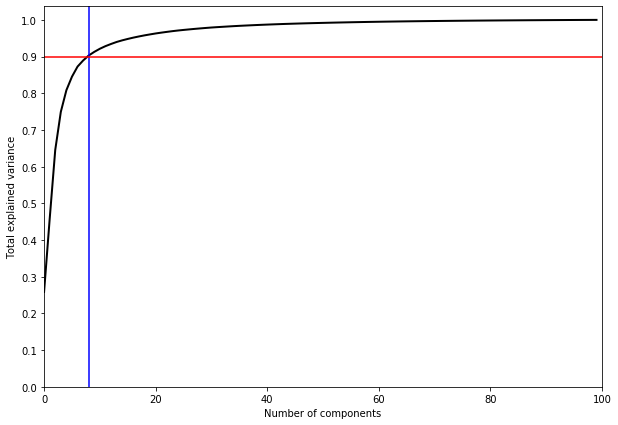

In [12]:
pca = PCA().fit(habs_vectors)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c = 'b')
plt.axhline(0.9, c = 'r')
plt.show()

Можно сжать до 8 измерений

In [13]:
habs_vectors_pca = PCA(n_components = 8).fit_transform(habs_vectors)
habs_vectors_pca

array([[ 9.04382393e-02, -1.68443099e-02,  1.08577214e-01, ...,
        -1.21477582e-01, -8.17351341e-01, -2.80167252e-01],
       [ 4.74624597e-02,  6.48124069e-02,  7.45093673e-02, ...,
         1.77547894e-02, -8.82065773e-01, -3.54952365e-01],
       [-6.52643621e-01,  9.85074103e-01,  2.75755405e-01, ...,
        -8.04952025e-01, -5.62146246e-01, -3.48180592e-01],
       ...,
       [-7.51083910e-01, -7.08902478e-01, -4.99470890e-01, ...,
         1.77474450e-02, -1.56344511e-02,  7.55821588e-04],
       [-2.04135522e-01, -2.06971094e-01, -1.41822934e-01, ...,
         2.44604629e-02,  1.25855273e-02,  1.86000811e-03],
       [-3.97189856e-01, -3.77658486e-01, -2.75571078e-01, ...,
        -1.60554529e-03, -7.71905668e-03,  1.74292212e-03]], dtype=float32)

In [14]:
def get_vector(hab):
    return w2v_model.wv[row]

habs_clusters = pd.DataFrame(columns = ['hab', 'agglomerative_cluster'])
habs_clusters['hab'] = w2v_model.wv.key_to_index.keys()
habs_clusters

,hab,agglomerative_cluster
0,компания,NaN
1,блог,NaN
2,разработка,NaN
3,программирование,NaN
4,веб,NaN
...,...,...
1704,1c,NaN
1705,smmframe,NaN
1706,связной,NaN
1707,экспресс,NaN


#### Agglomerative model

In [15]:
def vectors_of_cluster_n(vectors, cluster_number):
    items = habs_clusters[habs_clusters['agglomerative_cluster'] == cluster_number]['hab']
    vectors = [vectors[i] for i in items.index]
    return vectors

def compute_distances(vectors):
    distances = []
    for i in range(len(vectors)):
        for j in range(i + 1, len(vectors)):
            distances.append(np.linalg.norm(vectors[i] - vectors[j]))
    return sum(distances)

def elbow_method(train_data):
    distances_for_k_clusters = []
    for k in tqdm(range(1, 40)):
        
        # обучение модели
        agglomerative_model = AgglomerativeClustering(n_clusters = k)
        agglomerative_model.fit(train_data)
        habs_clusters['agglomerative_cluster'] = agglomerative_model.labels_
        
        # итоговые суммы расстояний внутри кластеров
        total_distance = 0
        for i in range(0, k + 1):
            total_distance += compute_distances(vectors_of_cluster_n(train_data, i))

        distances_for_k_clusters.append(total_distance)
        
    return distances_for_k_clusters

100%|██████████| 39/39 [00:58<00:00,  1.49s/it]


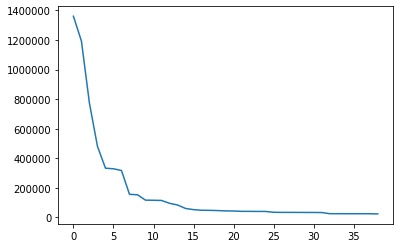

In [16]:
distances_for_k_clusters = elbow_method(habs_vectors_pca)
plt.plot(distances_for_k_clusters)

Видно, что график выходит на плато в районе 13 кластеров.

In [17]:
number_of_clusters = 13
agglomerative_model = AgglomerativeClustering(n_clusters = number_of_clusters)
agglomerative_model.fit(habs_vectors_pca)
habs_clusters['agglomerative_cluster'] = agglomerative_model.labels_
habs_clusters

,hab,agglomerative_cluster
0,компания,1
1,блог,1
2,разработка,7
3,программирование,4
4,веб,7
...,...,...
1704,1c,1
1705,smmframe,0
1706,связной,0
1707,экспресс,0
